## Deep CNN Architecture 1


In [14]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver
from time import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape


X_val:  (1000L, 3L, 32L, 32L)
X_train:  (49000L, 3L, 32L, 32L)
X_test:  (1000L, 3L, 32L, 32L)
y_val:  (1000L,)
y_train:  (49000L,)
y_test:  (1000L,)


## Train Deep CNN Architecture 1



In [29]:
from cs231n.classifiers.convnet1 import *

best_model = None
best_val = -1
results = {}
solvers = {}
times = {}

network_architectures =  {'CONV1=32x3x3 CONV2=128x3x3':([32,128],[3,3]),
                          'CONV1=64x3x3 CONV2=128x3x3':([64,128],[3,3])  
                        }
learning_rates = [3e-4]
regularization_strengths = [0.001]

for label, network in network_architectures.iteritems():
    print 'CONV Network:', label
    for i in range(1):
        print 'Run number: %d '% i
        n, f = network
        version = 1
        for lr in learning_rates:
            for reg in regularization_strengths:
                print 'Learning rate: %e Reg Strength: %e '% (lr, reg)
                model = DeepConvNet(num_filters=n, filter_sizes=f, weight_scale=1e-2, hidden_dim=500, reg=reg, verbose=False)

                t1 = time()               
                solver = Solver(model, data,
                    num_epochs=8, batch_size=50,
                    update_rule='adam',
                    optim_config={
                      'learning_rate': lr,
                    },lr_decay=0.95, 
                    verbose=True, print_every=20)
                solvers[(label,i,version,lr,reg)] = solver
                solver.train()
                t2 = time()

                times[(label,i,version,lr,reg)] = (t2 - t1)
                print 'Training Time: %fs' % (t2 - t1)
        
                results[(label,i,version,lr,reg)] = solver.best_val_acc
  
                if (solver.best_val_acc > best_val):
                    best_val = solver.best_val_acc
                    best_model = model
            
                version += 1

CONV Network: CONV1=64x3x3 CONV2=128x3x3
Run number: 0 
Learning rate: 3.000000e-04 Reg Strength: 1.000000e-03 
(Iteration 1 / 7840) loss: 2.518515
(Epoch 0 / 8) train acc: 0.142000; val_acc: 0.167000
(Iteration 21 / 7840) loss: 2.042790
(Iteration 41 / 7840) loss: 1.912951
(Iteration 61 / 7840) loss: 2.165797
(Iteration 81 / 7840) loss: 1.842493
(Iteration 101 / 7840) loss: 1.904907
(Iteration 121 / 7840) loss: 1.618373
(Iteration 141 / 7840) loss: 1.601550
(Iteration 161 / 7840) loss: 1.388225
(Iteration 181 / 7840) loss: 1.352792
(Iteration 201 / 7840) loss: 1.256573
(Iteration 221 / 7840) loss: 1.361286
(Iteration 241 / 7840) loss: 1.369861
(Iteration 261 / 7840) loss: 1.186020
(Iteration 281 / 7840) loss: 1.442590
(Iteration 301 / 7840) loss: 1.385815
(Iteration 321 / 7840) loss: 1.614393
(Iteration 341 / 7840) loss: 1.348813
(Iteration 361 / 7840) loss: 1.423826
(Iteration 381 / 7840) loss: 1.295474
(Iteration 401 / 7840) loss: 1.396899
(Iteration 421 / 7840) loss: 1.443517
(Iter

CONV1=32x3x3 CONV2=128x3x3 (Version 1) lr = 3.000000e-04; reg = 1.000000e-03, val accuracy: 0.744000
CONV1=64x3x3 CONV2=128x3x3 (Version 1) lr = 3.000000e-04; reg = 1.000000e-03, val accuracy: 0.743000
best validation accuracy achieved during cross-validation: 0.744000



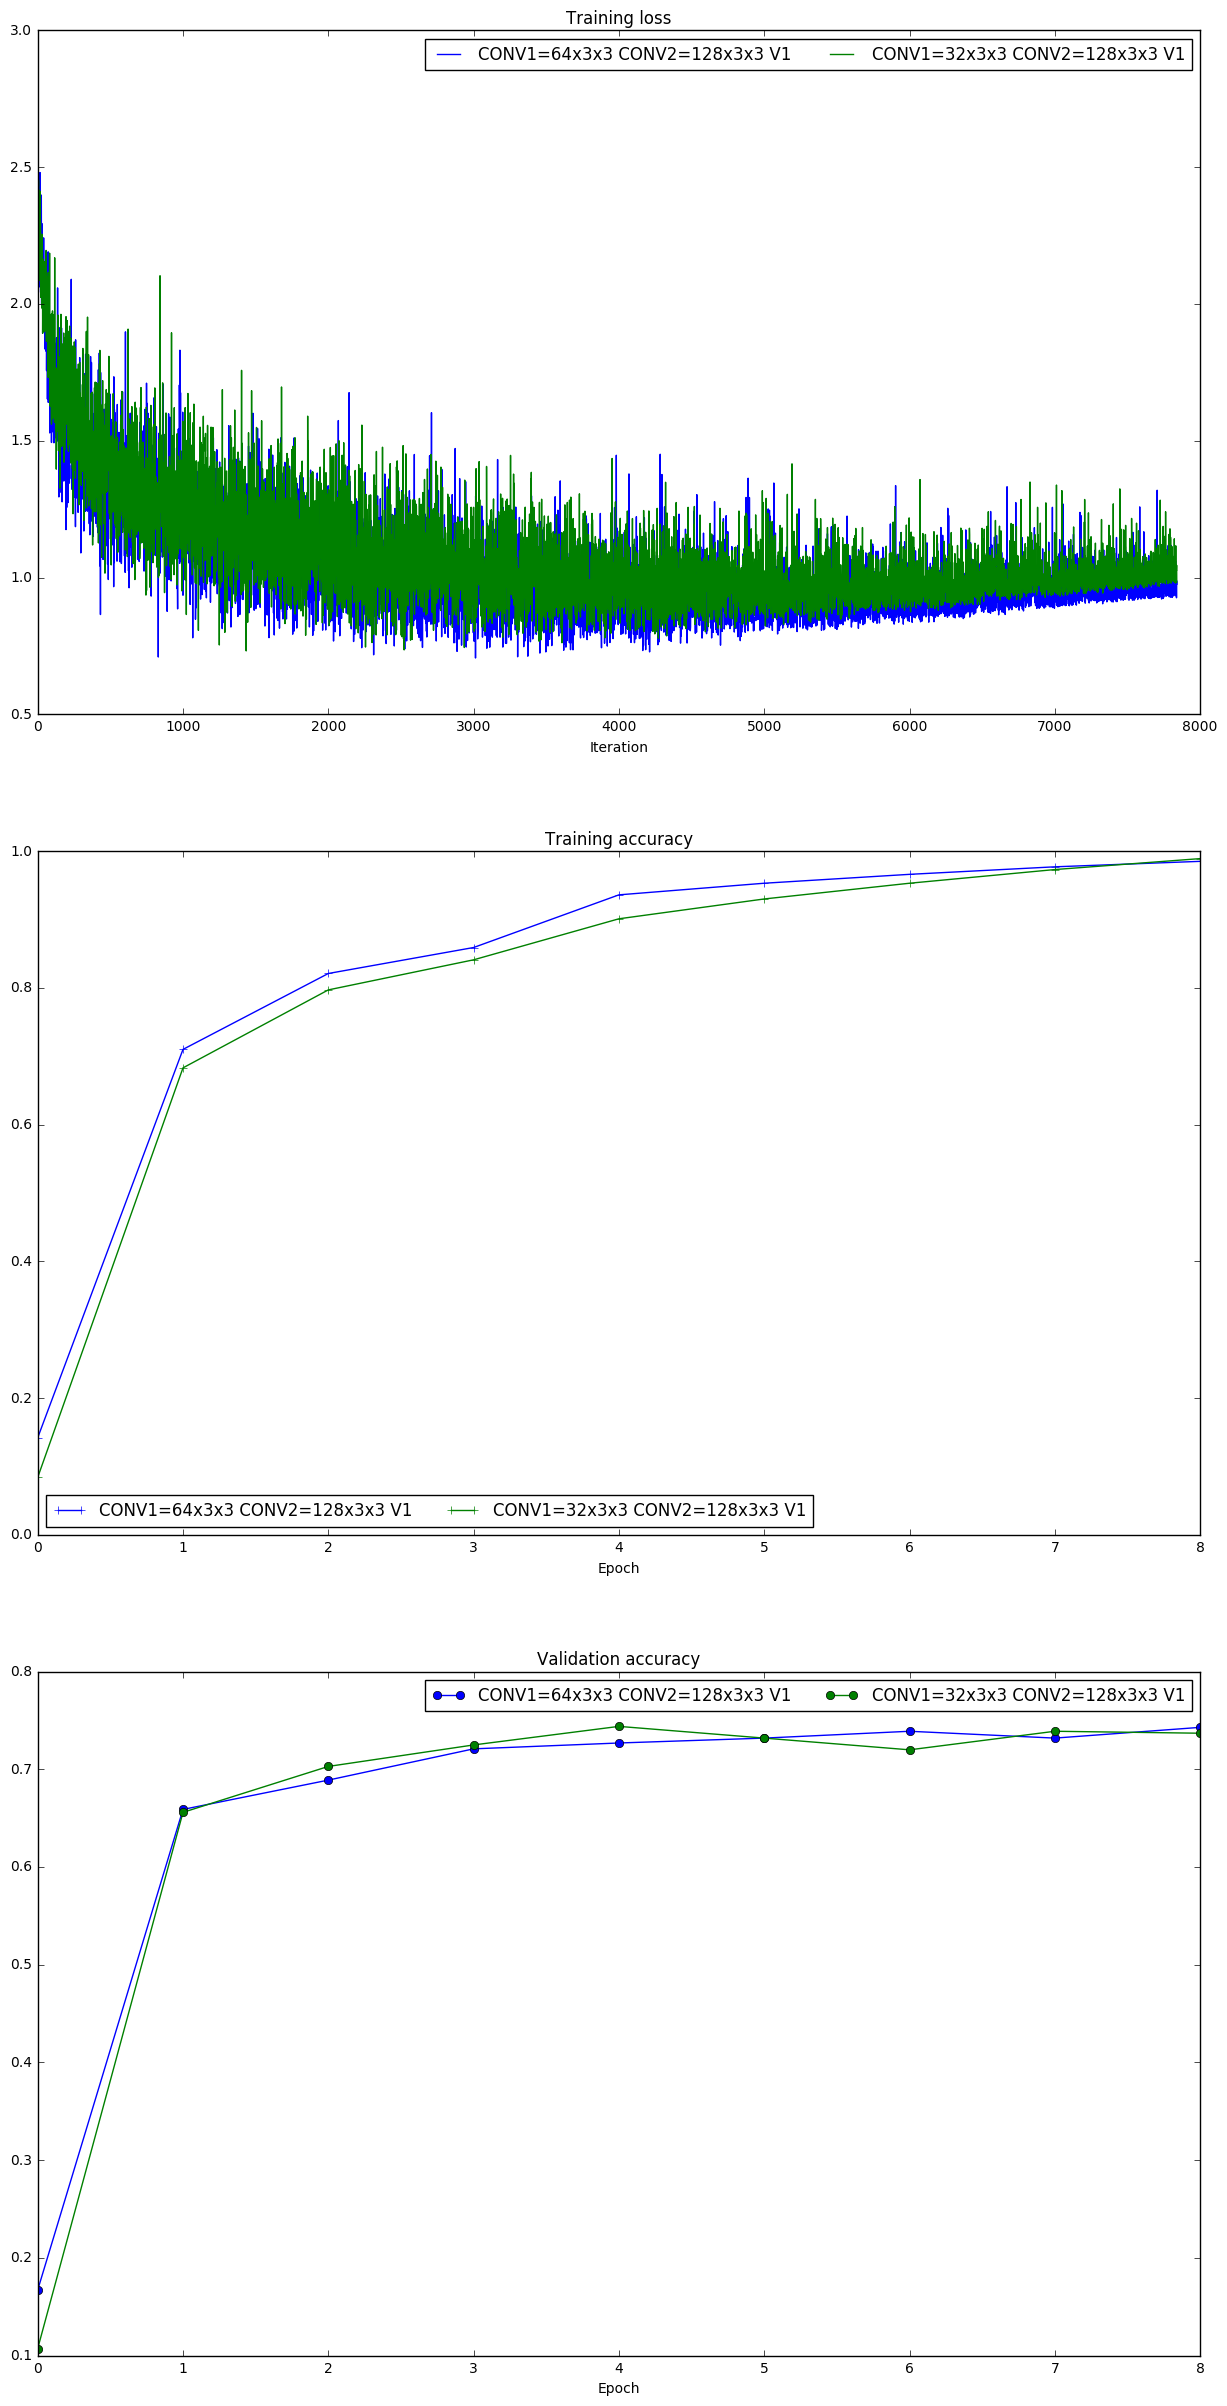

In [30]:
# Print out results.
v = 1
for param,accuracy in sorted(results.iteritems()):
    architecture, i, version, lr, reg = param
    print '%s (Version %d) lr = %e; reg = %e, val accuracy: %f' % (architecture, version, lr, reg, accuracy)
    v += 1
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

print 

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for items, solver in solvers.iteritems():
  label = "%s V%d" % (items[0], items[2])
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, '-', label=label)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-+', label=label)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=label)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='best', ncol=2)
plt.gcf().set_size_inches(15, 30)
plt.show()

In [28]:
print solvers

y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print 'Validation set accuracy: ', (y_val_pred == data['y_val']).mean()
print 'Test set accuracy: ', (y_test_pred == data['y_test']).mean()

{('CONV1=64x3x3 CONV2=128x3x3', 0, 1, 0.0003, 0.001): <cs231n.solver.Solver object at 0x0000000002B69E80>, ('CONV1=32x3x3 CONV2=128x3x3', 0, 1, 0.0003, 0.001): <cs231n.solver.Solver object at 0x0000000008F89EB8>}
Validation set accuracy:  0.728
Test set accuracy:  0.717
